# Instalação das bibliotecas


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura da base de dados

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projeto_Modulo6/nova_base_tratada2')
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."


# Teste isolado

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Exemplo de DataFrame com coluna de texto pré-processado
teste_isolado = pd.DataFrame({'texto': ['Este é um exemplo de texto pré-processado.',
                             'Outro exemplo de texto tratado.',
                             'Mais um texto pré-processado.']})

# Inicializar o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Vetorizar a coluna de texto
vetorizado = tfidf_vectorizer.fit_transform(teste_isolado['texto'])

# Obter os nomes das características
feature_names = tfidf_vectorizer.get_feature_names_out()

# Criar um novo DataFrame com as características vetorizadas
teste_isolado_vetorizado = pd.DataFrame(vetorizado.toarray(), columns=feature_names)

# Concatenar o DataFrame vetorizado com o DataFrame original
teste_isolado_final = pd.concat([teste_isolado, teste_isolado_vetorizado], axis=1)

# Exibir o DataFrame final
display(teste_isolado_final)

,texto,de,este,exemplo,mais,outro,processado,pré,texto,tratado,um
0,Este é um exemplo de texto pré-processado.,0.369308,0.485596,0.369308,0.000000,0.000000,0.369308,0.369308,0.286801,0.000000,0.369308
1,Outro exemplo de texto tratado.,0.406192,0.000000,0.406192,0.000000,0.534093,0.000000,0.000000,0.315444,0.534093,0.000000
2,Mais um texto pré-processado.,0.000000,0.000000,0.000000,0.569431,0.000000,0.433067,0.433067,0.336315,0.000000,0.433067


# Modelo de vetorização - TFIDF

In [5]:
tfidf_vectorizer = TfidfVectorizer()

vetorizado = tfidf_vectorizer.fit_transform(df['texto_tratado'])

feature_names = tfidf_vectorizer.get_feature_names_out()

df_vetorizado = pd.DataFrame(vetorizado.toarray(), columns=feature_names)
df_vetorizado = df_vetorizado.drop(columns=['sentimento'])

df_final = pd.concat([df, df_vetorizado], axis=1)

In [6]:
df_final

,autor,sentimento,texto_tratado,a_aphotographs,a_doce_casa,aa,aaa,aaaah,aaaahhh,aabb,...,𝚜𝚎𝚛,𝚜𝚎𝚞𝚜,𝚜𝚞𝚊,𝚝𝚎,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,lmviapiana,2,"['minuto', 'touro', 'ouro']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_final['sentimento']

0       1
1       1
2       2
3       2
4       0
       ..
8035    2
8036    2
8037    2
8038    1
8039    0
Name: sentimento, Length: 8040, dtype: int64

# Testes dos valores das colunas

In [8]:
df_final['ser'].value_counts()

0.000000    8014
0.136855       1
0.089819       1
0.178045       1
0.162049       1
0.147501       1
0.176240       1
0.090406       1
0.073729       1
0.264882       1
0.436092       1
0.064391       1
0.145558       1
0.133492       1
0.405338       1
0.190045       1
0.169664       1
0.314675       1
0.081824       1
0.149980       1
0.066284       1
0.177696       1
0.143129       1
0.478244       1
0.164816       1
0.167999       1
0.120388       1
Name: ser, dtype: int64

In [9]:
df_final['aa'].value_counts()

0.000000    8039
0.215284       1
Name: aa, dtype: int64

In [10]:
df_final['𝚜𝚎𝚞𝚜'].value_counts()

0.000000    8039
0.131107       1
Name: 𝚜𝚎𝚞𝚜, dtype: int64

# 1º Modelo Naive Bayes com Glove


*   Recall clase 0 = 75%
*   Recall Total = 53%
*   Acurácia = 50%






In [11]:
target = df_final['sentimento']
target

0       1
1       1
2       2
3       2
4       0
       ..
8035    2
8036    2
8037    2
8038    1
8039    0
Name: sentimento, Length: 8040, dtype: int64

In [12]:
feature = df_final.iloc[:,3:df_final.shape[1]]

In [13]:
feature

,a_aphotographs,a_doce_casa,aa,aaa,aaaah,aaaahhh,aabb,aabbrio,aacdoficial,aai,...,𝚜𝚎𝚛,𝚜𝚎𝚞𝚜,𝚜𝚞𝚊,𝚝𝚎,𝚝𝚞𝚍𝚘,𝚞𝚖𝚊,𝚟𝚊,𝚟𝚊𝚒,𝚟𝚊𝚕𝚘𝚛𝚎𝚜,𝚟𝚘𝚕𝚊𝚝𝚒𝚕𝚒𝚍𝚊𝚍𝚎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_final.shape

(8040, 18461)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [16]:
y_train

921     2
322     1
4299    2
4907    1
6217    1
       ..
5226    2
5390    2
860     2
7603    2
7270    1
Name: sentimento, Length: 6432, dtype: int64

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf = clf.fit(X_train,y_train.values.ravel())

Y_pred = clf.predict(X_test)

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.35      0.75      0.48       360
           1       0.64      0.32      0.43       597
           2       0.63      0.52      0.57       651

    accuracy                           0.50      1608
   macro avg       0.54      0.53      0.49      1608
weighted avg       0.57      0.50      0.50      1608



In [18]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("Precisão final de :",format_output)

Precisão final de : 49.94%


# 2º Modelo Random Forest com TFIDF

*   Recall clase 0 = 58%
*   Recall Total = 68%
*   Acurácia = 70%

In [19]:
target = df_final['sentimento']
feature = df_final.iloc[:,3:df_final.shape[1]]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Construir o modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Treinar o modelo
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
# Aplicar a validação cruzada
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)  # cv=5 indica 5 folds de validação cruzada

# Imprimir os scores de validação cruzada
print("Scores de validação cruzada:", cv_scores)
print("Média dos scores:", np.mean(cv_scores))

Scores de validação cruzada: [0.69308469 0.70862471 0.68273717 0.67573872 0.68429238]
Média dos scores: 0.6888955350852706


In [23]:
# Avaliar o modelo
y_pred = model_rf.predict(X_test)

# Gerar o relatório de classificação
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       360
           1       0.66      0.72      0.69       597
           2       0.73      0.73      0.73       651

    accuracy                           0.70      1608
   macro avg       0.70      0.68      0.69      1608
weighted avg       0.70      0.70      0.69      1608



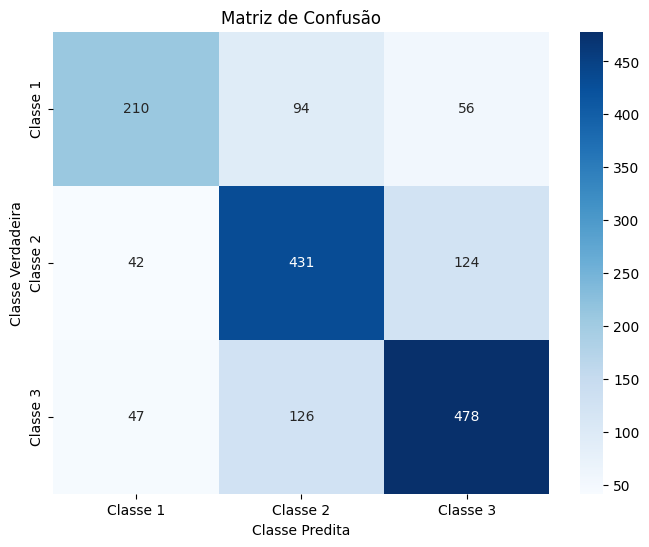

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

# Definir as classes
classes = ['Classe 1', 'Classe 2', 'Classe 3']

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

# Modelo Rede Neural (Sequência de palavras)

In [25]:
! pip install pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=24ff2345b2ae2a15201da354b425ac189ad4189ab6769a0a5962b5735f97f24c
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [26]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences
import seaborn as sns
citacao = [
    "Estudo no Inteli e escolhi o curso de Sistemas de Informação",
    "Estamos fazendo um projeto para o BTG",
    "Estamos no segundo ano de graduação",
    "Somos do grupo BTG3"
]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(citacao)
citacao_token = tokenizer.texts_to_sequences(citacao)

max_length = max([len(z) for z in citacao_token]) + 1
citacao_pad = pad_sequences(citacao_token, maxlen=max_length, padding="post")

In [30]:
rede_neural_df = pd.read_csv("/content/drive/MyDrive/Projeto_Modulo6/nova_base_tratada2")

In [31]:
rede_neural_df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."


In [32]:
x, y = rede_neural_df["texto_tratado"], rede_neural_df["sentimento"]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

words = ["o", "ao", 'aos', 'os', 'a', 'as', 'e', 'um', 'uma',
        'ele', 'ela', 'eles', 'elas', 'do', 'da', 'dos', 'das',
        'de', 'no', 'na', 'nos', 'nas', 'pelo', 'pela', 'pelos',
        'pelas', 'num', 'numa', 'nuns', 'numas', 'dum', 'duma',
        'duns', 'dumas']

x_filter = []

for title in x:
  for word in words:
    title = title.replace(word, '')
  x_filter.append(title)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_filter)

vocab = len(tokenizer.word_docs) + 1

x_filter = tokenizer.texts_to_sequences(x_filter)

max_length = max([len(z) for z in x_filter])
x_filter = pad_sequences(x_filter, maxlen=max_length, padding='post')

x_train, x_test, y_train, y_test = train_test_split(x_filter, y, test_size=0.33)

print("Tamanho de x:", len(x_filter))
print("Tamanho de y:", len(y))

Tamanho de x: 8040
Tamanho de y: 8040


In [33]:
import tensorflow.keras.backend as K
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

model_rede_neural_df = Sequential()
model_rede_neural_df.add(Embedding(input_dim=vocab, output_dim=80, input_length=max_length, trainable=True))
model_rede_neural_df.add(GlobalMaxPooling1D())
model_rede_neural_df.add(Dropout(0.3))
model_rede_neural_df.add(Dense(units=3, activation='softmax'))

model_rede_neural_df.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[recall])

mc = ModelCheckpoint('weight.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')

model_rede_neural_df.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=4, callbacks=[mc])

print(model_rede_neural_df.evaluate(x_test, y_test))

Epoch 1/4
168/169 [============================>.] - ETA: 0s - loss: 1.0465 - recall: 1.3815

169/169 [==============================] - 13s 61ms/step - loss: 1.0466 - recall: 1.3748 - val_loss: 0.9940 - val_recall: 1.2913
Epoch 2/4
169/169 [==============================] - ETA: 0s - loss: 0.9183 - recall: 1.2305

169/169 [==============================] - 11s 62ms/step - loss: 0.9183 - recall: 1.2305 - val_loss: 0.8758 - val_recall: 1.2325
Epoch 3/4
169/169 [==============================] - ETA: 0s - loss: 0.7796 - recall: 1.1962

169/169 [==============================] - 6s 37ms/step - loss: 0.7796 - recall: 1.1962 - val_loss: 0.7946 - val_recall: 1.2156
Epoch 4/4
168/169 [============================>.] - ETA: 0s - loss: 0.6602 - recall: 1.1784

83/83 [==============================] - 0s 2ms/step - loss: 0.7460 - recall: 1.1791
[0.745989978313446, 1.1791218519210815]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_probs = model_rede_neural_df.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

classification = classification_report(y_test, y_pred_classes)

print("\nRelatório de Classificação:")
print(classification)

83/83 [==============================] - 0s 2ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       651
           1       0.69      0.64      0.66       957
           2       0.69      0.77      0.73      1046

    accuracy                           0.69      2654
   macro avg       0.68      0.68      0.68      2654
weighted avg       0.69      0.69      0.68      2654



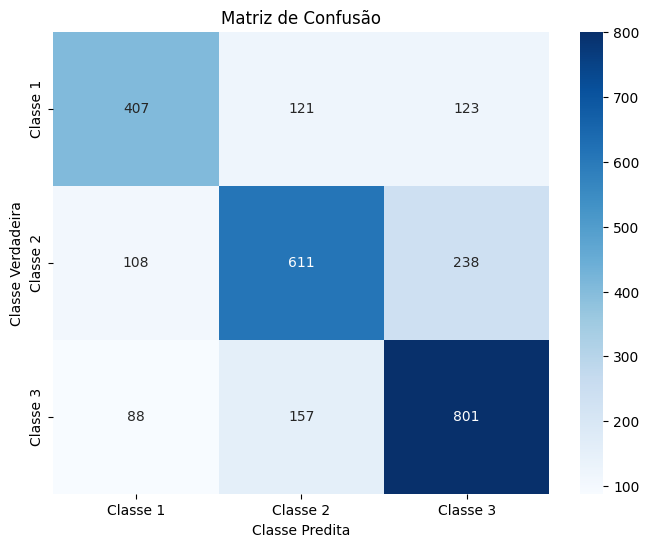

In [35]:
cm = confusion_matrix(y_test, y_pred_classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()